# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nailah Tsabitah. M
- **Email:** nailah10tsabitah@gmail.com
- **ID Dicoding:** MC135d5X0073

## Menentukan Pertanyaan Bisnis

- Bagaimana tren polusi udara dalam lima tahun terakhir
- Apa saja yang paling mempengaruhi kualitas udara

## Import Semua Packages/Library yang Digunakan

In [2]:
!pip install streamlit

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

import streamlit as st


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00


## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv("/PRSA_Data_Nongzhanguan_20130301-20170228.csv")

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [13]:
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Jumlah baris: 35064
Jumlah kolom: 18


**Insight:**
- Saya mengimport dataset air quality dari PRSA_Data_Nongzhanguan_20130301-20170228.csv. Didalamnya terdapat data dengan parameter tahun, bulan, hari, jam,PM2.5, PM10, SO2,	NO2,	CO,	O3,	TEMP,	PRES,	DEWP,	RAIN,	wd,	WSPM	dan station
- Saya juga menampilkan 5 data teratas dari sheets yang menampilkan nilai-nilai dari parameter yang ada
- Saya juga menampilkan jumlah baris dan kolom dari datasetnya

### Assessing Data

In [6]:
df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,628
PM10,440
SO2,446
NO2,692
CO,1206


**Insight:**
- Saya mengecek jika ada missing value pada dataset yang sudah saya import, dan dari keluarannya ditemukan bahwa ada banyak missing value pada PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd dan WSPM

In [7]:
df.duplicated().sum()

np.int64(0)

**Insight:**
- Saya juga mengecek jika ada data yang terduplikasi, tetapi setelah menjalankan code tidak ada yang duplicate

### Cleaning Data

In [12]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage.apply(lambda x: f"{x:.2f}%"))

No         0.00%
year       0.00%
month      0.00%
day        0.00%
hour       0.00%
PM2.5      1.79%
PM10       1.25%
SO2        1.27%
NO2        1.97%
CO         3.44%
O3         1.44%
TEMP       0.06%
PRES       0.06%
DEWP       0.06%
RAIN       0.06%
wd         0.22%
WSPM       0.04%
station    0.00%
dtype: object


In [15]:
df_cleaned = df.dropna()
print(f"Jumlah baris: {df_cleaned.shape[0]}")
print(f"Jumlah kolom: {df_cleaned.shape[1]}")

Jumlah baris: 33114
Jumlah kolom: 18


In [16]:
df_cleaned.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Setelah mengecek persentase data yang memiliki missing value ternyata tidak banyak, saya memutuskan untuk melakukan pembersihkan data dengan cara menghapusnya.
- Setelahnya saya mengecek kembali jika ada missing value dan hasilnya sudah tidak ada missing value
- Setelah men-drop untuk cleaning, tersisa 33114 baris dari 35064 baris sebelumnya

## Exploratory Data Analysis (EDA)

### Explore ...

In [17]:
df_cleaned.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000,33114.000000
mean,17651.646554,2014.681373,6.461799,15.685420,11.519176,84.720783,109.175929,18.560198,58.213457,1327.784381,58.614905,13.698473,1012.495573,2.521988,0.066896,1.858045
std,10079.349513,1.170139,3.439149,8.823626,6.948669,85.633679,95.022778,24.109360,36.379472,1248.356734,58.561702,11.447876,10.268242,13.789830,0.807603,1.272080
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,9071.250000,2014.000000,3.000000,8.000000,6.000000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.200000,1003.900000,-8.700000,0.000000,1.000000
50%,17735.500000,2015.000000,6.000000,16.000000,11.000000,59.000000,86.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.100000,3.200000,0.000000,1.500000
75%,26323.750000,2016.000000,9.000000,23.000000,18.000000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.100000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Saya menggunakan describe() untuk mengatahui ringkasan statistik dari dataset yang sudah saya bersihkan sebelumnya
- Dari sini saya menemukan bahwa polusi PM10 itu sangat berfariasi dimana minimalnya adalah 2 sementara maksimalnya adalah 995

## Visualization & Explanatory Analysis

### Pertanyaan 1:

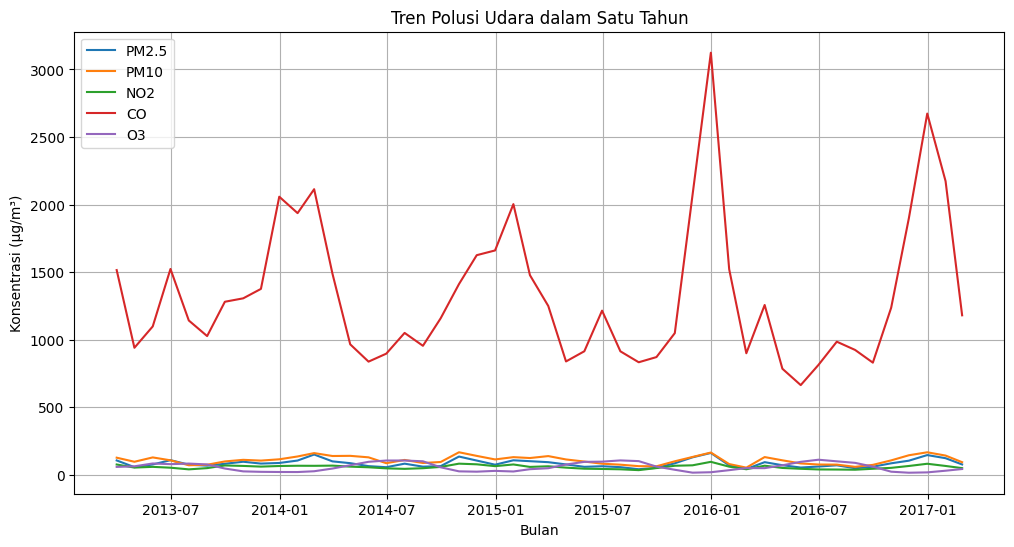

In [30]:
df_cleaned = df.copy()
df_cleaned['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df_cleaned.set_index('date', inplace=True)
monthly_avg = df_cleaned.resample('ME').mean(numeric_only=True)

plt.figure(figsize=(12, 6))
for polutan in ['PM2.5', 'PM10', 'NO2', 'CO', 'O3']:
    plt.plot(monthly_avg.index, monthly_avg[polutan], label=polutan)

plt.xlabel('Bulan')
plt.ylabel('Konsentrasi (µg/m³)')
plt.title('Tren Polusi Udara dalam Satu Tahun')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

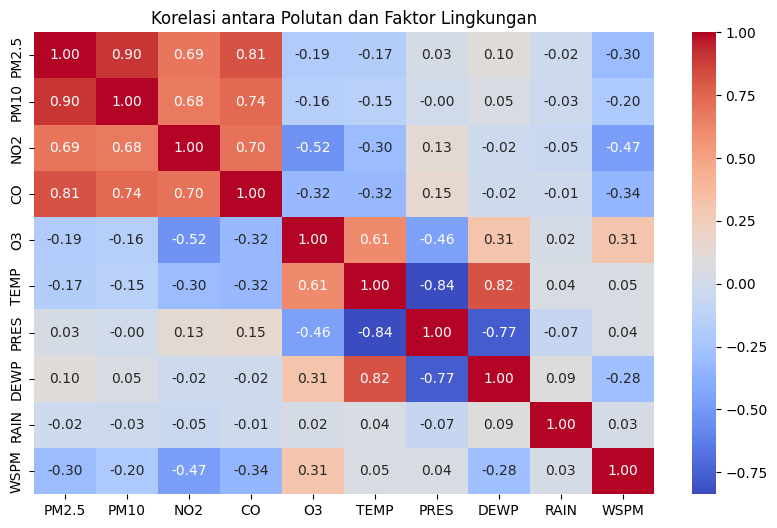

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Korelasi antara Polutan dan Faktor Lingkungan')
plt.show()


**Insight:**
- Pertanyaan 1: Bagaimana tren polusi udara dalam lima tahun terakhir
  - CO paling tinggi pada bulan januari di tahun 2016
  - Polutan lain punya nilai yang lebih kecil dibanding CO
  - Setiap awal tahun, polutan menagalami kenaikan

- Pertanyaan 2: Apa saja yang paling mempengaruhi kualitas udara
  - Beberapa faktor yang mempengaruhi kualitas udara diantaranya:
    - ada polutan yang saling berhubungan seperti PM2.5 dan PM10 yang sangat berhubungan, hal ini bisa terjadi karena sumber polutan ini sama yaitu pembakaran
    - faktor lingkungan, suhu, kecepatan angin dan tekanan udata juga mempengaruhi polusinya

## Analisis Lanjutan (Opsional)

## Conclusion

- Tren polusi udara dalam lima tahun terakhir: Peningkatan polusi di awal tahun bisa disebabkan oleh faktor musiman, seperti peningkatan aktivitas industri dan kondisi atmosfer yang memerangkap polutan.
CO sebagai polutan dominan menunjukkan adanya sumber utama seperti kendaraan bermotor dan industri.

- Faktor yang mempengaruhi kualitas udara: Polusi udara dipengaruhi oleh kombinasi sumber emisi (misalnya pembakaran) dan faktor lingkungan.
Memahami tren polusi dan faktor lingkungan dapat membantu dalam pengambilan keputusan untuk mengurangi dampak polusi udara.